In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('D:/MYSQL/mysql_sj/airbnb/train_users_2.csv')
df2 = pd.read_csv('D:/MYSQL/mysql_sj/airbnb/sessions.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

- id：用户ID
- date_account_created：帐户创建日期
- date_first_booking：首次预订的日期
- gender：性别
- age：年龄
- signup_method：注册方式
- signup_flow：用户注册的页面
- language：语言偏好
- affiliate_channel：营销方式
- affiliate_provider：营销来源，例如google，craigslist，其他
- first_affiliate_tracked：在注册之前，用户与之交互的第一个营销广告是什么
- signup_app：注册来源
- first_device_type：注册时设备的类型
- first_browser：注册时使用的浏览器名称
- country_destination：目的地国家

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [5]:
# 1.查看重复值
df1.duplicated().sum()

0

In [6]:
# 1个用户存在多个行为记录，因此会重复
df2.duplicated().sum()

252536

In [7]:
# 2.查看缺失值
df1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

date_first_booking（首次预定时间）数据如果缺失，在业务上可以理解为用户并未下单，每月预定的用户

In [8]:
df1.groupby('age').count().sort_index(ascending = False).head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
age,,,,,,,,,,,,,,,
2014.0,710,710,710,342,710,710,710,710,710,710,677,710,710,710,710
2013.0,39,39,39,15,39,39,39,39,39,39,38,39,39,39,39
2008.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1995.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
1953.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


In [9]:
df1['age'].max()

2014.0

年龄包含了2014岁,1924等的数据，推测用户随意填写造成的，这类脏数据在分析时应及时排除

In [10]:
# 3.年龄分布在1-150岁，同时也存在一些异常数据，对于年龄不在7—80区间的数据，应删除（对异常值的处理）
df3 = df1[(df1['age']>= 7)&(df1['age']<= 80)]
df3

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US
213445,qbxza0xojf,2014-06-30,20140630235547,2014-07-02,FEMALE,23.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF


(array([ 1872.,  5686., 18461., 29897., 19499., 12842., 11123.,  6321.,
         5032.,  4709.,  2787.,  2073.,  1490.,   555.,   286.]),
 array([15.        , 19.33333333, 23.66666667, 28.        , 32.33333333,
        36.66666667, 41.        , 45.33333333, 49.66666667, 54.        ,
        58.33333333, 62.66666667, 67.        , 71.33333333, 75.66666667,
        80.        ]),
 <a list of 15 Patch objects>)

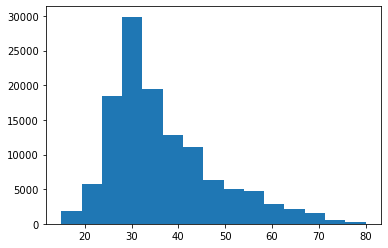

In [11]:
# 4.用户画像分析
# 4.1用户年龄分布情况
plt.hist(df3['age'],bins = 15)

- 年龄主要分布在29-39岁这个区间

In [12]:
# 4.2用户的性别
df3.groupby('gender').count().sort_index()

,id,date_account_created,timestamp_first_active,date_first_booking,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
gender,,,,,,,,,,,,,,,
-unknown-,16087,16087,16087,11516,16087,16087,16087,16087,16087,16087,15889,16087,16087,16087,16087
FEMALE,56536,56536,56536,29473,56536,56536,56536,56536,56536,56536,55685,56536,56536,56536,56536
MALE,49785,49785,49785,25919,49785,49785,49785,49785,49785,49785,48882,49785,49785,49785,49785
OTHER,225,225,225,159,225,225,225,225,225,225,225,225,225,225,225


女性别男性多(56421-49658)/49658 = 13.6%，总体差异不大

<BarContainer object of 25 artists>

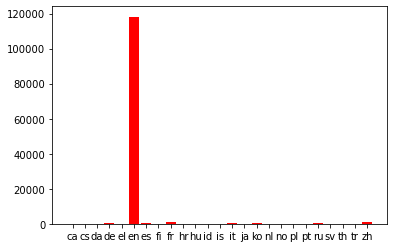

In [13]:
# 4.3用户所在地理位置分析
language_area = df3.groupby('language').id.count().sort_index()
plt.bar(x = range(language_area.shape[0]),
                  height = language_area.values,
                  tick_label = language_area.index,
                  color = 'red',
                  width = 0.8)

-- airbnb的产品国际化，用户遍布全球多个地区；
主要使用者为英语国家（欧美），中文用户使用者占比很小

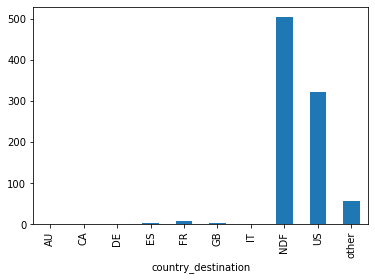

In [14]:
# 4.4中文用户去国外地区的占比
df3[df3['language'] == 'zh'].groupby('country_destination').id.count().sort_index().plot.bar()

In [15]:
df3[df3['language'] == 'zh'].groupby('country_destination').id.count().sort_index()

country_destination
AU         1
CA         1
DE         2
ES         3
FR         9
GB         3
IT         2
NDF      504
US       323
other     58
Name: id, dtype: int64

除了没有列明目的地，中国用户预定的民宿主要是美国

In [16]:
# 5.流量渠道分析
# 5.1每月新增用户
# 转换日期类型，并增加月份字段
df3['date_account_created'] = pd.to_datetime(df3['date_account_created'],format = '%Y-%m-%d')
df3['month'] = df3['date_account_created'].values.astype('datetime64[M]')

d:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


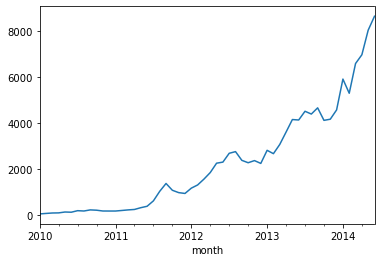

In [17]:
month_group = df3.groupby('month').id.count()
month_group.plot()

In [18]:
from pyecharts.charts import Line
from pyecharts.charts import Grid,Bar
from pyecharts import options as opts
line = Line(init_opts = opts.InitOpts(width = '1000px', height = '600px')).add_xaxis(
    xaxis_data = list(month_group.index.astype(str))
         ).add_yaxis(series_name = '用户数',y_axis = month_group, label_opts = opts.LabelOpts(
    is_show = False)).set_global_opts(xaxis_opts = opts.AxisOpts(name_rotate = 60,name = '日期',
                                                                axislabel_opts = {'rotate':45}),
    yaxis_opts = opts.AxisOpts(splitline_opts = opts.SplitLineOpts(is_show = True)),
    tooltip_opts = opts.TooltipOpts(trigger = 'axis', axis_pointer_type = 'cross'))
line.render_notebook()

- Airbnb的用户增长健康，2011年9月之前一直是平缓的增长，从2012年1月起，Airbnb的用户开始了快速增长的趋势,用户增长的方式很奏效，方法之一——聘用专业的摄影师为房源拍摄照片
- 此产品存在季节性规律，3-5，7-9月，产品会迎来用户增长的高峰

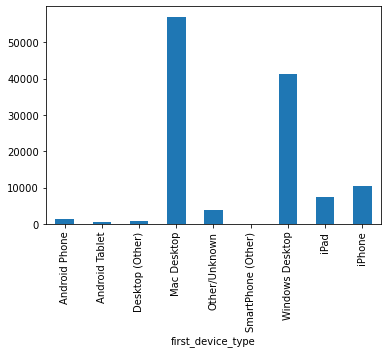

In [19]:
# 5.2不同用户端的注册量
df3.groupby('first_device_type').id.count().sort_index().plot.bar()

- 多数用户属于PC端，用户的注册设备PC端大于移动端
- 苹果设备的使用者大于其他设备数量（当时智能手机还不够普及）

In [20]:
# 5.31不同推广渠道+不同推广方式的注册量
affiliate_provider_group = df3.groupby(by =['affiliate_provider','affiliate_channel']).id.count()
affiliate_provider_group = affiliate_provider_group.sort_values()

<BarContainer object of 36 artists>

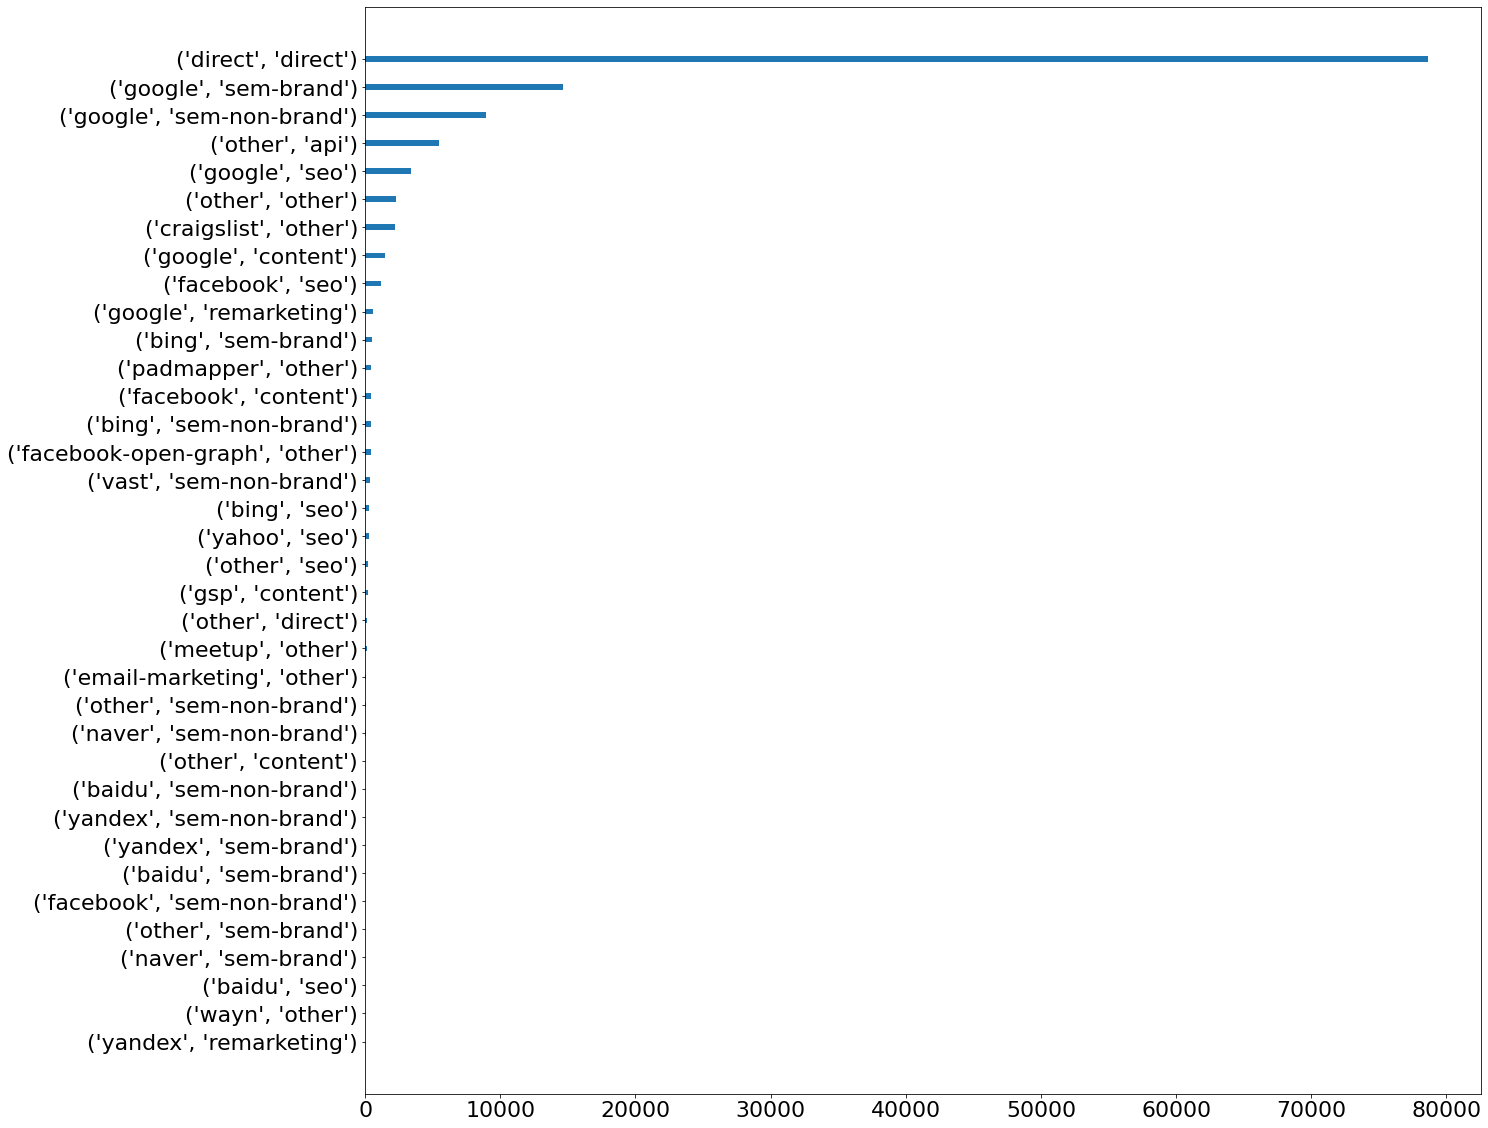

In [21]:
# 不同推广渠道的和方式的注册量
plt.figure(figsize = (20,20))
plt.yticks(range(len(affiliate_provider_group)),affiliate_provider_group.index,fontsize = 22)
plt.xticks(fontsize = 22)
plt.barh(range(len(affiliate_provider_group)),affiliate_provider_group,height = 0.2)

In [22]:
# 5.32不同推广方式的转化率
# 不同渠道的用户最终下单成为Airbnb的注册用户
date_first_booking_group = df3[df3['date_first_booking'].notnull()].groupby(by = ['affiliate_provider','affiliate_channel']).id.count()

In [23]:
# 计算转化率
affiliate_rate = round((date_first_booking_group /affiliate_provider_group)*100,2)
q = affiliate_rate.reset_index()
q['affiliate_provider_channel'] = q['affiliate_provider'].astype(str) + '_' + q['affiliate_channel'].astype(str)
affiliate_rate_new = q[['affiliate_provider_channel','id']]

In [24]:
# 将注册量和转换率合并展示
c = affiliate_provider_group.reset_index()
c['affiliate_provider_channel'] = c['affiliate_provider'].astype(str) + '_' + c['affiliate_channel'].astype(str)
affiliate_provider_group_new = c[['affiliate_provider_channel','id']]
affiliate_provider_group_new = affiliate_provider_group_new.rename(columns = {'id':'register_num'})
affiliate_provider_group_rate = affiliate_rate_new.merge(affiliate_provider_group_new,how = 'inner').sort_values('register_num',ascending = False)

In [25]:
# 
# b = Line(init_opts = opts.InitOpts(width = '1000px', height = '800px')
#     ).add_xaxis(xaxis_data = list(affiliate_provider_group_rate.affiliate_provider_channel)
#     ).add_yaxis(series_name = '注册数',y_axis= affiliate_provider_group_rate.register_num,
#                 label_opts = opts.LabelOpts(is_show = False)
#     ).extend_axis(yaxis = opts.AxisOpts(type_ = 'value',name = '转化率',min_ = 0, max_ = 65, interval = 10)
#     ).set_global_opts(xaxis_opts = opts.AxisOpts(type_ = 'category',name_rotate = 90, name = '营销及推广方式',
#                                                  axislabel_opts = {'rotate':90}),
#                       yaxis_opts = opts.AxisOpts(type_ = 'value', name = '注册数',
#                                                  splitline_opts = opts.SplitLineOpts(is_show = True),
#                                                 axistick_opts=opts.AxisTickOpts(is_show=True)),
#                       tooltip_opts = opts.TooltipOpts(is_show = True,trigger = 'axis', axis_pointer_type = 'cross'))
# e = Line(init_opts = opts.InitOpts(width = '1000px', height = '800px')
#         ).add_xaxis(xaxis_data = list(affiliate_provider_group_rate.affiliate_provider_channel)
#         ).add_yaxis('转化率',y_axis = affiliate_provider_group_rate.id.astype(float),label_opts = opts.LabelOpts(is_show = False),
#                    yaxis_index = 1)
# be = b.overlap(e)
# # gird使坐标轴离画框底部长，从而显示全部x轴
# grid = Grid().add(be,grid_opts = opts.GridOpts(pos_bottom = '32%'))

In [26]:
# 问题1：不显示数据——查找数据的格式是否准确
# 问题2：第二个y轴不匹配数据，查看语法格式
# color = "rgba(237,125,49, 0.5)"中的0.5可以调节柱图的透明度
num_bar = Bar(
             ).add_xaxis(xaxis_data = list(affiliate_provider_group_rate.affiliate_provider_channel)
            ).add_yaxis('注册数',list(affiliate_provider_group_rate.register_num),label_opts = opts.LabelOpts(is_show= False),
                        color = "rgba(237,125,49, 0.5)"
            ).extend_axis(yaxis=opts.AxisOpts(name = '转化率',
                          min_ = 0, max_ = 100, interval = 10, axislabel_opts = opts.LabelOpts(formatter = "{value}%"),
                          splitline_opts = opts.SplitLineOpts(is_show = True, linestyle_opts = opts.LineStyleOpts(opacity = 1)))
            ).set_global_opts(tooltip_opts=opts.TooltipOpts(is_show=True,trigger="axis",axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True,type_="shadow"),
            name_rotate = 90, name = '营销及推广方式',axislabel_opts = {'rotate':90},
            name_gap = 40),
# name_gap是调节x轴标题的距离
        yaxis_opts=opts.AxisOpts(
                type_="value",
                name="注册数",min_ = 0, max_ = 80000,
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True)),
            title_opts=opts.TitleOpts(title="不同渠道+不同推广方式"))
rate_line = Line().add_xaxis(list(affiliate_provider_group_rate.affiliate_provider_channel)
                 ).add_yaxis('转化率',affiliate_provider_group_rate.id, yaxis_index = 1)

num_rate = num_bar.overlap(rate_line)

grid = Grid().add(num_rate,grid_opts = opts.GridOpts(pos_bottom = '32%'),is_control_axis_index=True)

grid.render_notebook()

- 从整体情况来看，airbnb渠道转化率表现得很好，多数的渠道转化率都在30%以上
- 表现最好的是谷歌竞价(SEO)，其中品牌竞价注册量大于非品牌竞价的注册量
- 渠道注册量符合二八法则，即排名前七的渠道（共36个渠道方式）贡献了90%以上的注册量
- 用户直接下载的注册量是最多的
- Google和craigslist的注册量也是较高的，同时这两者的转化率也很高，达到了一种很好的营销效果

# 存在的问题
- 以内容(content)方式推广的转化率较低，其中facebook_content的转化率仅有14.05%

In [27]:
# 5.4不同营销内容的注册量和转化率
# 不同的营销内容的注册量
first_affiliate_tracked_group = df3.groupby('first_affiliate_tracked').id.count().sort_values(ascending = False)
# 不同的营销内容的带来的预定数量
first_affiliate_tracked_count = df3[df3['date_first_booking'].notnull()].groupby('first_affiliate_tracked').id.count().sort_values(ascending = False)
# 转化率
first_affiliate_tracked_rate = round((first_affiliate_tracked_count/first_affiliate_tracked_group)*100,2)

In [28]:
at = Bar().add_xaxis(list(first_affiliate_tracked_group.index)
         ).add_yaxis('注册数',list(first_affiliate_tracked_group),color = "rgb(255,69,0, 0.7)"
         ).extend_axis(yaxis = opts.AxisOpts(min_ = 0, max_ = 70, interval = 10,
                                             axislabel_opts = opts.LabelOpts(formatter = '{value}%'))
         ).set_global_opts(title_opts = opts.TitleOpts(title = '注册数+转化率'),
                           xaxis_opts=opts.AxisOpts(axislabel_opts = {'rotate':90},
                                                    axispointer_opts=opts.AxisPointerOpts(is_show=True)),
                           yaxis_opts=opts.AxisOpts(axistick_opts=opts.AxisTickOpts(is_show=True),
                                                    splitline_opts=opts.SplitLineOpts(is_show=True)),
                           tooltip_opts=opts.TooltipOpts(is_show=True,trigger="axis",axis_pointer_type="cross"))

rate = Line().add_xaxis(list(first_affiliate_tracked_group.index)).add_yaxis('转化率',list(first_affiliate_tracked_rate),yaxis_index = 1)

at_rate = at.overlap(rate)

grid1 = Grid().add(at_rate,grid_opts = opts.GridOpts(pos_bottom = '32%'),is_control_axis_index=True)

grid1.render_notebook()

- untracked带来转化率是最高的，虽是引流最好的一种营销方式，但是无法跟踪到数据，产品的数据异常
- 从统计的数据来看，linked的注册量第一，其转化率达至55.67%

In [29]:
# 6转化漏斗分析
# 6.1注册用户占比
user_group = df2.user_id.value_counts()
# 用户总数
sum_ = user_group.count()
# 注册用户总数
register = len(df3[df3['date_account_created'].notnull()].id.value_counts())
# 注册用户比
# register_rate = round(register/sum_ ,4) 
# register_rate

In [30]:
# 6.2活跃用户占比
# 用户操作10产品大于等于10次，说明用户属于活跃用户
active = len(user_group[user_group.values>= 10])
# active_rate = round(active/sum_, 4)
# active_rate

In [31]:
# 6.3下单用户占比
# 下单用户数
# pd.set_option('display.max_rows',200)
# pd.set_option('display.max_columns',200)
# df2.action_detail.value_counts().sort_index()
book = df2[df2['action_detail'] == 'reservations'].user_id.count()
# book_rate = round(book/sum_,4)

In [32]:
# 6.4实际支付用户占比
pay = df2[df2['action_detail'] == 'payment_instruments'].user_id.count()
# pay_rate = round(pay/sum_,4)

In [33]:
# 6.5复购用户占比
book_again = df2[df2['action_detail'] == 'payment_instruments'].groupby('user_id').count()
book_num = book_again[book_again['action']>= 2].action.count()
# book_num_rate = round(book_num/sum_,4)

In [34]:
list = (['总用户数',sum_],
        ['注册用户数',register],
        ['活跃用户数',active],
        ['下单用户数',book],
        ['实际支付用户占比',pay],
        ['复购用户占比',book_num])
funnel_num = pd.DataFrame(list,columns = ['环节','人数'])
r = funnel_num['人数']/funnel_num.loc[0,'人数'] * 100
funnel_num['转化率'] = r.apply(lambda x: round(x,2))

In [35]:
a = funnel_num[['环节','转化率']]
data1 = a.values.tolist()
data1

[['总用户数', 100.0],
 ['注册用户数', 90.52],
 ['活跃用户数', 84.14],
 ['下单用户数', 23.86],
 ['实际支付用户占比', 17.25],
 ['复购用户占比', 3.07]]

In [36]:
# 画出漏斗模型
from pyecharts.charts import Funnel
funnel = Funnel(init_opts=opts.InitOpts(width = '800px', height = '600px')
                ).add('环节',data1,label_opts = opts.LabelOpts(formatter = '{b}:{c}%')
                ).set_global_opts(title_opts = opts.TitleOpts(title = '转化率'))
funnel_1 = Grid().add(funnel,grid_opts = opts.GridOpts(pos_right = '100%'),is_control_axis_index=True)
funnel.render_notebook()

- 从活跃用户到下单用户，流失率是最高的一个环节
- 下单的客户中，有近6%的客户没有付款，需要研发接入排查
- 复购率仅有17.8%,说明airbnb的产品和服务还需要继续完善

   ## 用户画像
- 建议一：根据年龄分布特征，建议SEO优化或付费广告投放时，投放对象细化至29-39岁这个区间的人群

## 渠道及推广方式
- 建议二：推广方式上减少content的选择，统计google_content、facebook_content和gsp_content三种渠道的ARPU(平均每位客户的收入)和ROI，如果ROI>ARPU，建议终止该类渠道和推广方式的投放
- 建议三：以SEO方式推广的各渠道，其转化率都处于较高的水平，建议考虑扩大SEO团队或增加对对该团队的资源投入
- 建议四：营销内容不同带来的转化效果不同，linked和marketing带来较好的转化的营销内容，对于local ops，应优化或者更换
- 建议五：营销内容上引流方式最好的untracked，但是无法追踪到数据，建议埋点，及时捕捉用户的行为数据
- 建议六：根据产品的季节性规律，3-5，7-9月，加大推广力度

## 转化漏斗方面
- 建议七：活动用户到下单用户，应提高该环节的转化率。建议围绕该环节开展更多的工作，如定期给活跃用户，以邮件或是短信的形式推送优质房源（或是折扣信息）